# LSTM network to predict open price on stocks



## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

2024-02-22 20:17:46.026348: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-22 20:17:46.063821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 20:17:46.063856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 20:17:46.065170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 20:17:46.070791: I tensorflow/core/platform/cpu_feature_guar

## Opening data

In [2]:
data = pd.read_csv('AAPL_precos_abertura.csv')
data.head()

,Date,Open,Close
0,2019-01-02,38.722500,39.480000
1,2019-01-03,35.994999,35.547501
2,2019-01-04,36.132500,37.064999
3,2019-01-07,37.174999,36.982498
4,2019-01-08,37.389999,37.687500


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
time_step = 40

Text(0.5, 0, 'Days')

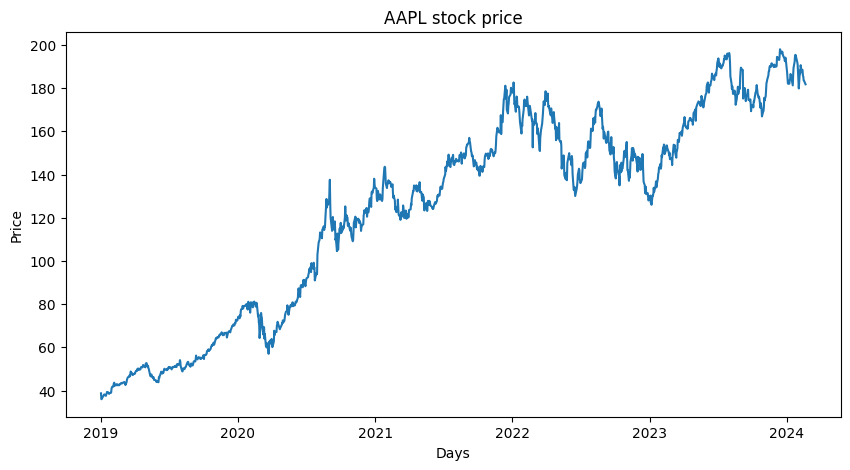

In [4]:
#plotting the data
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Open'])
plt.title('AAPL stock price')
plt.ylabel('Price')
plt.xlabel('Days')

## Separate data in train and test 

In [5]:
split = int(len(data) * 0.75)
train = data[:split]
test = data[split:]
print("Train shape:",train.shape, "\nTest shape", test.shape)

Train shape: (969, 3) 
Test shape (323, 3)


## Creating X and Y train

In [6]:
X = train[['Open','Close']].values
X = X.reshape(-1, 2)
print(X.shape)

(969, 2)


In [7]:
# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(X[i-time_step:i, :])
    y_train.append(X[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train shape:", X_train.shape, "\ny_train shape:", y_train.shape)

X_train shape: (929, 40, 2) 
y_train shape: (929,)


In [9]:
#Reshape the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
print("X_train shape:", X_train.shape)
y_train = y_train.reshape(-1, 1)
print("y_train shape:", y_train.shape)

X_train shape: (929, 40, 2)
y_train shape: (929, 1)


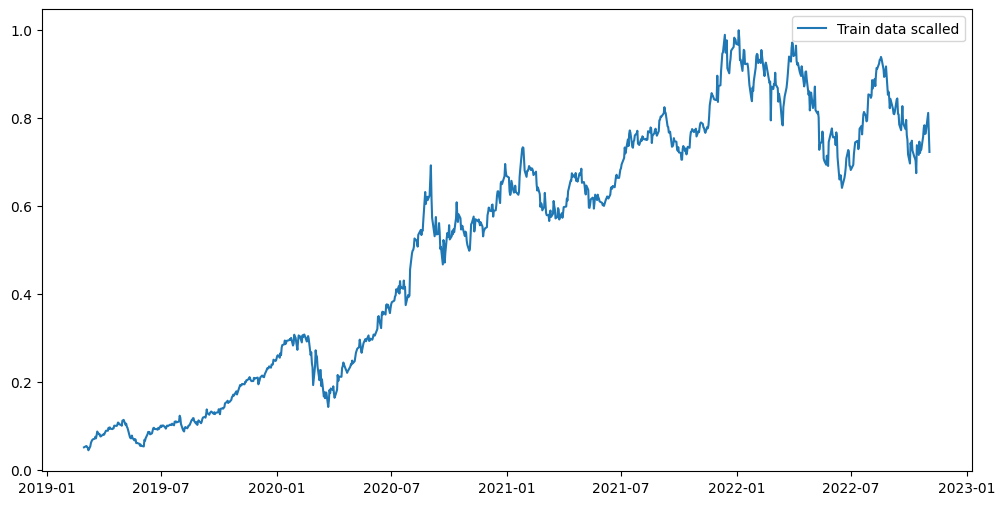

In [10]:
#plotting the data
plt.figure(figsize=(12,6))
plt.plot(train['Date'][time_step:], y_train, label='Train data scalled')
plt.legend()


## Creating X and Y test

In [11]:
test_data = scaler.transform(test[['Open','Close']].values.reshape(-1, 2))
print("Test data shape:", test_data.shape)

Test data shape: (323, 2)


In [12]:
X_test = []
y_test = []

for i in range(time_step, len(test)):
    X_test.append(test_data[i-time_step:i, :])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
print("X_test shape:", X_test.shape, "\ny_test shape:", y_test.shape)

X_test shape: (283, 40, 2) 
y_test shape: (283,)


In [13]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
print("X_test shape:", X_test.shape)
y_test = y_test.reshape(-1, 1)
print("y_test shape:", y_test.shape)

X_test shape: (283, 40, 2)
y_test shape: (283, 1)


## Create LSTM model

In [14]:
# model
def create_ltsm_model(X, time_step):
    model = Sequential()
    model.add(LSTM(units=128,return_sequences=False, input_shape=(time_step, X.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(units=30))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics = ["accuracy"])
    return model


In [15]:
model = create_ltsm_model(X_train, time_step)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 30)                3870      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 70973 (277.24 KB)
Trainable params: 70973 (277.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
hist = model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
30/30 [==============================] - 2s 13ms/step - loss: 0.0484 - accuracy: 0.0011
Epoch 2/25
30/30 [==============================] - 0s 15ms/step - loss: 0.0099 - accuracy: 0.0011
Epoch 3/25
30/30 [==============================] - 1s 18ms/step - loss: 0.0061 - accuracy: 0.0011
Epoch 4/25
30/30 [==============================] - 1s 22ms/step - loss: 0.0051 - accuracy: 0.0011
Epoch 5/25
30/30 [==============================] - 1s 17ms/step - loss: 0.0044 - accuracy: 0.0011
Epoch 6/25
30/30 [==============================] - 0s 16ms/step - loss: 0.0039 - accuracy: 0.0011
Epoch 7/25
30/30 [==============================] - 0s 14ms/step - loss: 0.0036 - accuracy: 0.0011
Epoch 8/25
30/30 [==============================] - 0s 16ms/step - loss: 0.0033 - accuracy: 0.0011
Epoch 9/25
30/30 [==============================] - 0s 15ms/step - loss: 0.0032 - accuracy: 0.0011
Epoch 10/25
30/30 [==============================] - 0s 16ms/step - loss: 0.0036 - accuracy: 0.0011
Epoch 11/

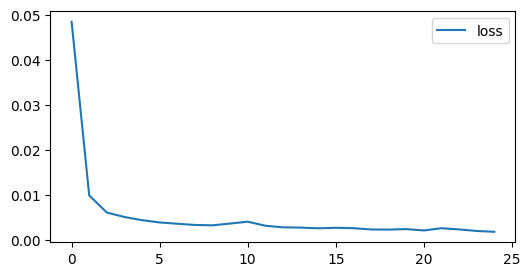

In [17]:
# Loss history
plt.figure(figsize=(6,3))
plt.plot(hist.history['loss'], label='loss')
plt.legend()


30/30 [==============================] - 1s 7ms/step


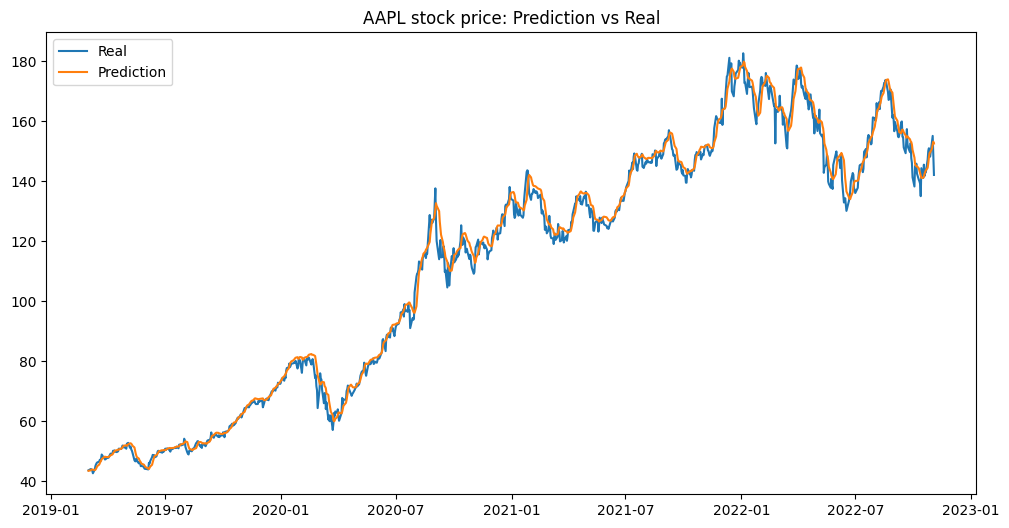

In [18]:
predict = model.predict(X_train)
add1 = np.zeros((len(predict), 1))
predict = np.concatenate((predict, add1), axis=1)
add2 = np.zeros((len(y_train), 1))
y_train1 = np.concatenate((y_train, add2), axis=1)

#plotting the data
plt.figure(figsize=(12,6))
plt.plot(train['Date'][time_step:], scaler.inverse_transform(y_train1)[:,[0]], label='Real')
plt.plot(train['Date'][time_step:], scaler.inverse_transform(predict)[:,[0]], label='Prediction')
plt.title('AAPL stock price: Prediction vs Real')
plt.legend()


## Predict test

9/9 [==============================] - 0s 6ms/step


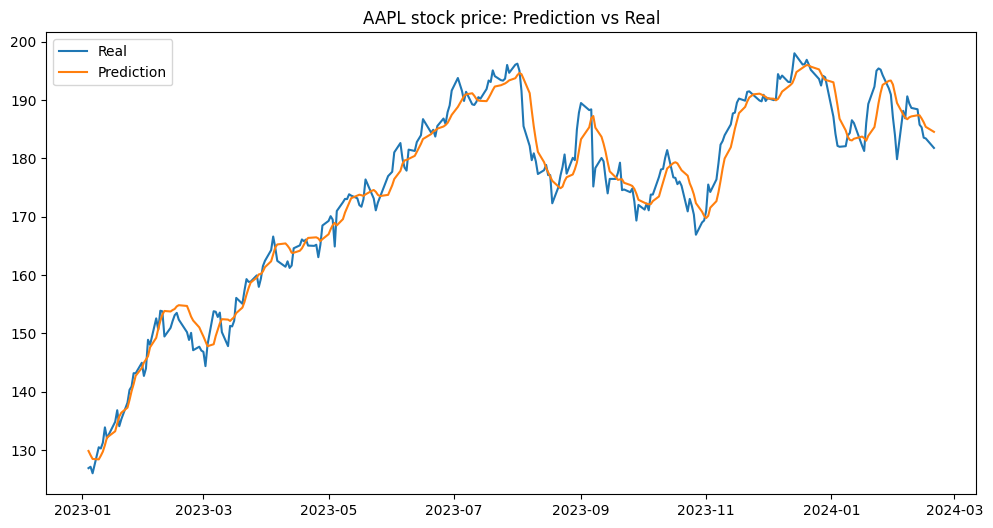

In [19]:
predict = model.predict(X_test)
add1 = np.zeros((len(predict), 1))
predict = np.concatenate((predict, add1), axis=1)
add2 = np.zeros((len(y_test), 1))
y_test1 = np.concatenate((y_test, add2), axis=1)

#plotting the data
plt.figure(figsize=(12,6))
plt.plot(test['Date'][time_step:], scaler.inverse_transform(y_test1)[:,[0]], label='Real')
plt.plot(test['Date'][time_step:], scaler.inverse_transform(predict)[:,[0]], label='Prediction')
plt.title('AAPL stock price: Prediction vs Real')
plt.legend()


## Next day predict

In [20]:
data.iloc[-1]

Date     2024-02-20 00:00:00
Open              181.789993
Close             181.559998
Name: 1291, dtype: object

In [21]:
last = data.iloc[-time_step:]
last = last[['Open','Close']].values
last = scaler.transform(last.reshape(-1, 2))
print(last.shape)

(40, 2)


In [22]:
result = model.predict(last.reshape(1, time_step, 2))
add1 = np.zeros((len(result), 1))
result = np.concatenate((result, add1), axis=1)
result = scaler.inverse_transform(result)
print("Predicted price for the next day:", result[0][0])

1/1 [==============================] - 0s 38ms/step
Predicted price for the next day: 183.56858968848337


In this notebook I used two columns of information to feed the network, the open and close value. Using these two features
the results were better than using just the open value.